# test-8

LogCircular 1:100 GO (FLUX)

9 gen 2024 but at 23 dic 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None, show_conservative=False):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['std FLUX err'],"r-+", linewidth=1.0, label='Exact Error (std)')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['std FLUX err'],"b-+", linewidth=0.3, label='GlobRef exact error (std) (Reference)')

  if show_conservative:
    plt.loglog(data['DoFs'], data['Cons. FLUX err'],"r:+", linewidth=1.0, label='Exact Error (cons)')
    if reference_file_name is not None:
      plt.loglog(reference_data['DoFs'], reference_data['Cons. FLUX err'],"b:+", linewidth=0.5, label='GlobRef exact error (cons) (Reference)')
      
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated FLUX error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['std FLUX err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['std FLUX err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

config-2

Mesh-A, non-iso

    cycle  cells    DoFs     ex POINT err               L2               H1  \
0       0   5760    5820 2.5429110493e+01 1.6302386256e+00 2.2218827840e+03   
1       1   5907    6020 1.7105175109e+01 1.0571759947e+00 1.8506747645e+03   
2       2   6195    6393 1.0502294443e+01 6.1680343915e-01 1.5022275051e+03   
3       3   6516    6830 9.2879590339e+00 5.4333321381e-01 1.4270229631e+03   
4       4   7020    7500 9.0351439360e+00 5.2854324290e-01 1.4101693986e+03   
5       5   8460    9420 8.9706425554e+00 5.2467413675e-01 1.4057443778e+03   
6       6  11328   13246 8.9627991344e+00 5.2420451503e-01 1.4051477727e+03   
7       7  16770   20467 4.6916598667e+00 2.8860057114e-01 1.1105682983e+03   
8       8  29841   36729 2.0267175344e+00 2.4125977892e-01 8.7784895281e+02   
9       9  50223   62573 6.8454355225e-01 2.6924707189e-01 7.3342768434e+02   
10     10  86868  109151 5.5982893349e-01 3.1193962466e-01 5.6940317029e+02   

       std FLUX err          est err   Cons. FLUX e

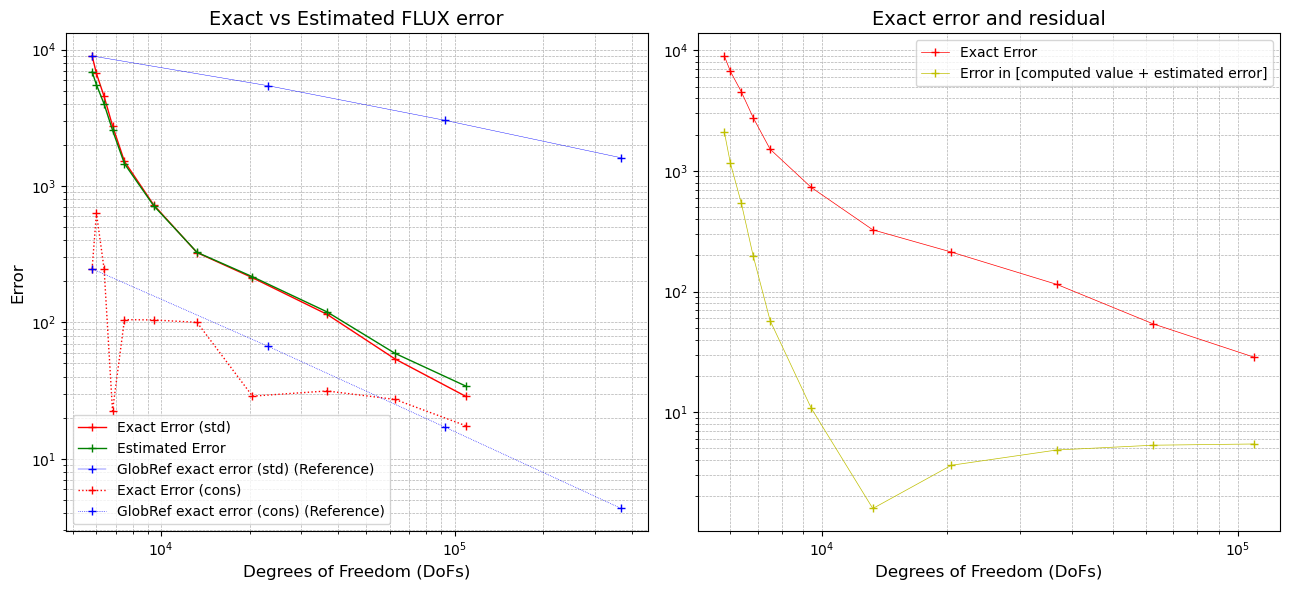

In [4]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv",show_conservative=True)

config-4

mesh-B \
iso

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     252     270 5.2599015999e+01 2.9113970145e+00 2.2465357781e+03   
1       1     297     331 5.0379053666e+01 2.8073935846e+00 2.1599261978e+03   
2       2     378     439 4.9496236833e+01 2.7672701602e+00 2.1244328417e+03   
3       3     546     665 4.9262531740e+01 2.7567892278e+00 2.1149268263e+03   
4       4     888    1121 4.9223865751e+01 2.7550615268e+00 2.1133510462e+03   
5       5    1794    2265 4.4074534929e+01 2.5383454957e+00 1.8920925157e+03   
6       6    3129    3892 1.5078321342e+01 7.3878440255e-01 1.2941326692e+03   
7       7    6324    8022 1.3079296177e+01 5.6445004658e-01 1.1008608420e+03   
8       8   10914   13318 5.1969291062e+00 1.9440679751e-01 7.3568643384e+02   
9       9   21564   26964 4.3379126420e+00 1.5725463984e-01 6.2205525880e+02   
10     10   39957   50121 1.5519706375e+00 9.9006236962e-02 4.8700509469e+02   
11     11   77313   97783 1.4088025203e+

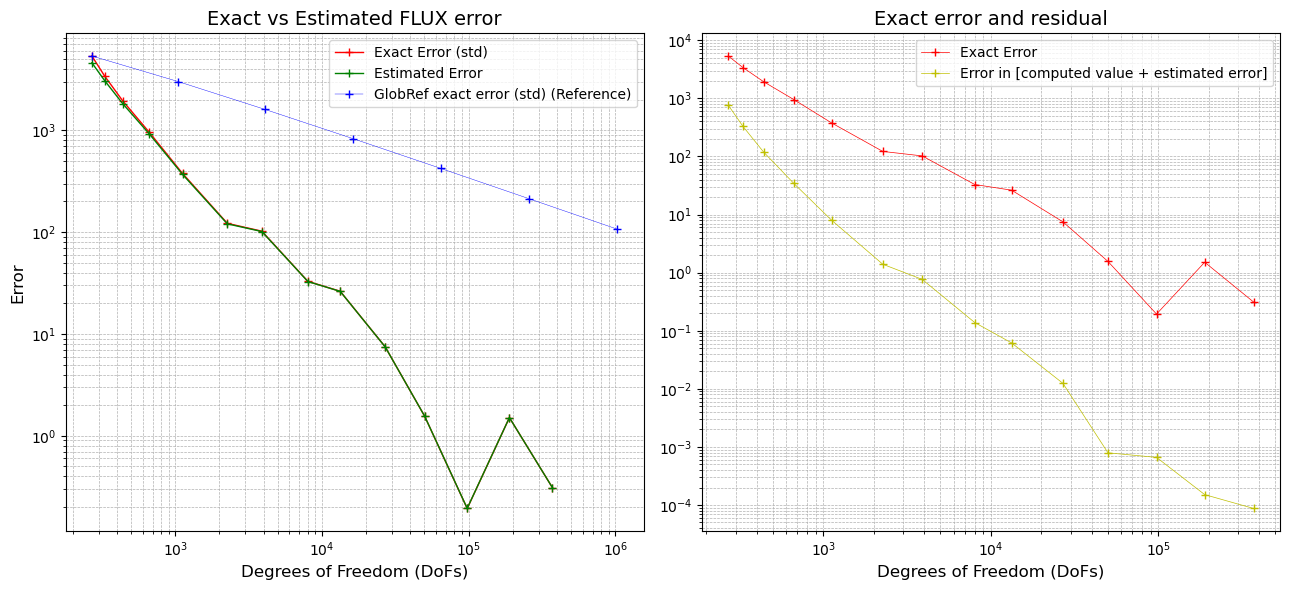

In [3]:
make_plots("./results/config-4/convergence_results.csv","./results/config-3/convergence_results.csv",show_conservative=False)

config-5

refine_optimize(3)

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0     252     270 5.2599015999e+01 2.9113970145e+00 2.2465357781e+03   
1       1     306     342 4.9844803098e+01 2.7829613220e+00 2.1385009526e+03   
2       2     414     486 4.9307190146e+01 2.7587812794e+00 2.1167409525e+03   
3       3     630     774 4.9229995757e+01 2.7553345487e+00 2.1136002300e+03   
4       4    1764    2052 1.5079703635e+01 7.3884517406e-01 1.2942249995e+03   
5       5    2628    3204 1.5078367968e+01 7.3878640992e-01 1.2941357193e+03   
6       6    7272    8424 5.1969572995e+00 1.9441072757e-01 7.3568898074e+02   
7       7   10728   13032 5.1969358853e+00 1.9440979589e-01 7.3568646031e+02   
8       8   29520   34128 1.4798928436e+00 4.9868446913e-02 3.8854441041e+02   
9       9   43344   52560 1.4798925070e+00 4.9868432291e-02 3.8854433537e+02   
10     10  119733  138172 2.2497755197e-01 1.2565693706e-02 1.9864755609e+02   
11     11  175029  211900 2.2497754669e-

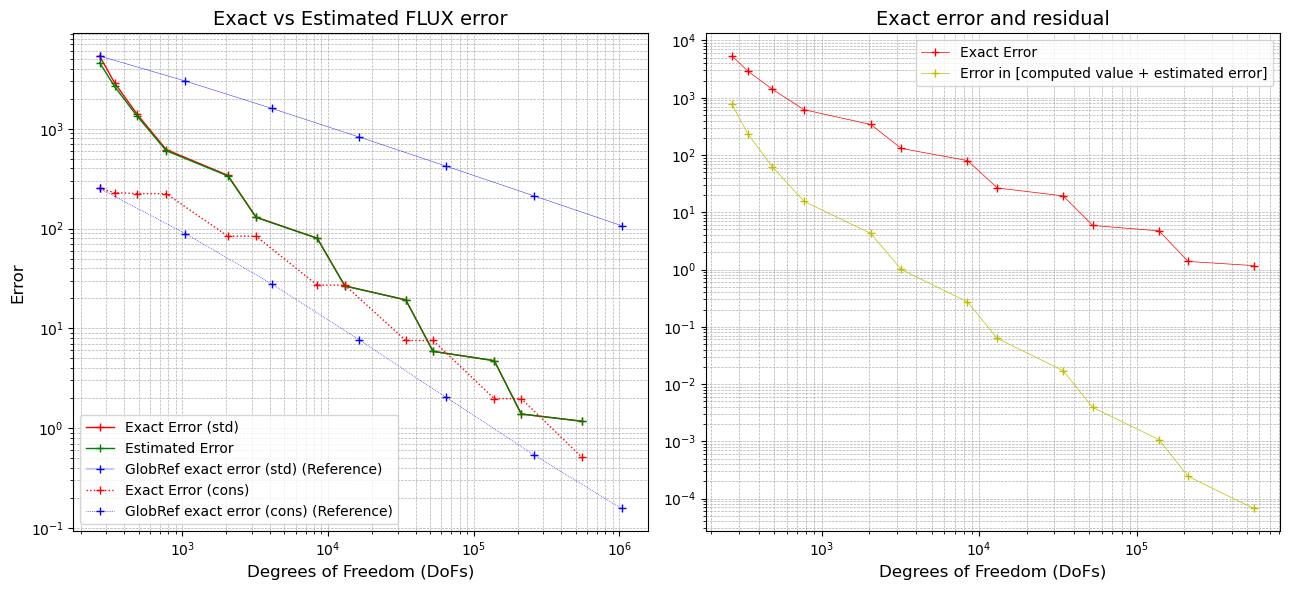

In [12]:
make_plots("./results/config-5/convergence_results.csv","./results/config-3/convergence_results.csv",show_conservative=True)

config-11

Mesh-B but before iso

    cycle  cells    DoFs     ex POINT err               L2               H1  \
0       0    252     270 5.1270882559e+01 1.8582515005e+00 3.2709390661e+03   
1       1    300     335 5.1894471014e+01 1.8538374105e+00 3.1621606366e+03   
2       2    402     471 5.2331793829e+01 1.8513967777e+00 3.1263115798e+03   
3       3    678     819 4.8239077475e+01 1.8917446901e+00 2.9978033689e+03   
4       4   1356    1637 3.2409041324e+01 2.3567523882e+00 2.4996336332e+03   
5       5   2376    2876 6.2867567651e+00 4.7711046222e-01 1.5890531884e+03   
6       6   5103    6302 3.8329977050e+00 5.1106237134e-01 1.3690102597e+03   
7       7   8820   10559 2.9098576606e+00 1.2420228235e-01 8.3391167769e+02   
8       8  17781   21662 2.1063905288e+00 1.2312422378e-01 7.2132364586e+02   
9       9  30891   36252 9.5296965908e-01 3.2197409326e-02 4.2741624057e+02   
10     10  54810   66084 6.0206608278e-02 3.6068055905e-02 3.9219789221e+02   
11     11  97065  117898 6.2220368176e-01 3.19965750

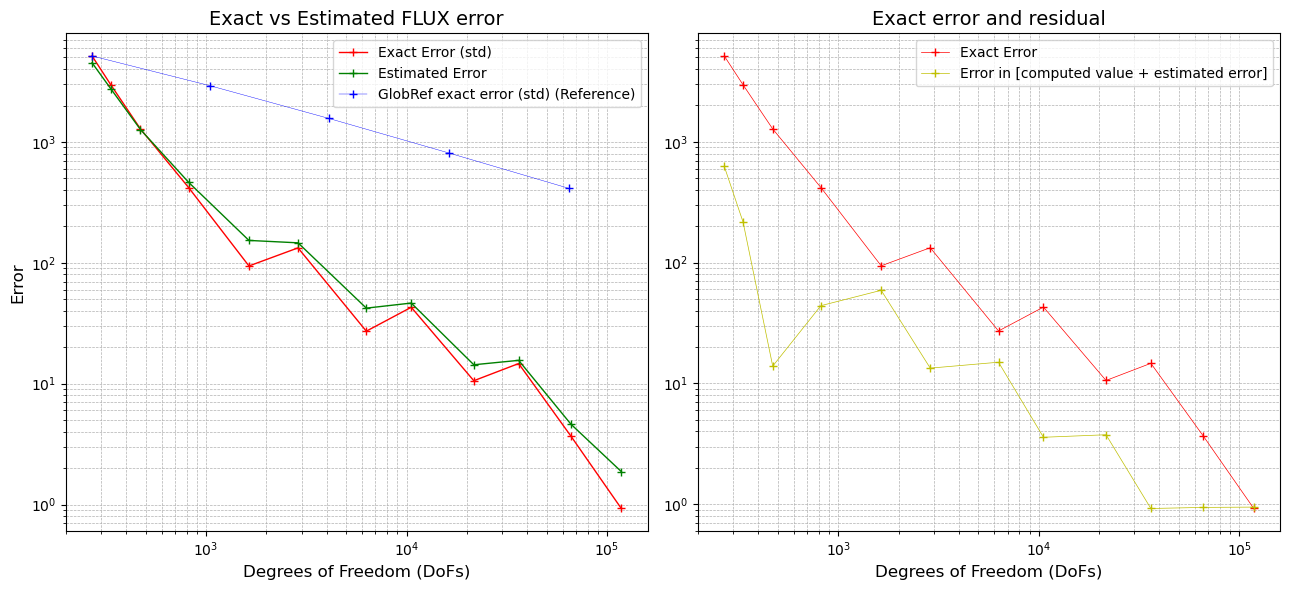

In [3]:
make_plots("./results/config-11/convergence_results.csv","./results/config-10/convergence_results.csv")